# **Assignment 4**


## Motka Samarth      
##202311023





### **Question 1**
**Generate 400 real numbers for the variable X from the uniform distribution U [0,1]. Construct the training set T = { (x1,y1),(x2,y2),......,(x100,y100)}using the relation Yi = sin(2 π xi) + εi where εi ~ N(0,0.25). In the similar way, construct a testing set of size 50**
**I,e. Test = { (x'1, y'1),(x’2, y’2),......,(x’50,y’50)}.**
**Estimate the regularized polynomial regression of order 10 with gradient descent method. Find the best NMSE, RMSE MAE and R2 by tuning the value of regularization parameter λ. Also obtain the corresponding plot of best estimate on test set.**

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x_train = np.sort(np.random.uniform(low = 0.0, high = 1.0, size = 400))
x_test = np.sort(np.random.uniform(low = 0.0, high = 1.0, size = 50))

epsilon_x = np.random.normal(0, 0.25, 400)
epsilon_y = np.random.normal(0, 0.25, 50)

y_train = np.sin(2 * np.pi * x_train) + epsilon_x
y_test = np.sin(2 * np.pi * x_test) + epsilon_y

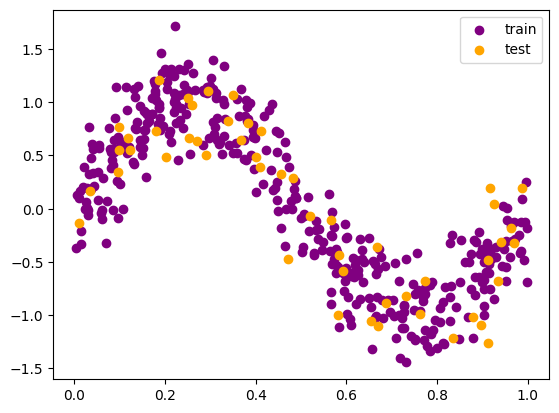

In [99]:
# Orignal Training and Testing Features plot
plt.scatter(x_train, y_train,color="purple")
plt.scatter(x_test, y_test,color="orange")
plt.legend(["train", "test"], loc ="upper right")
plt.show()

In [100]:
# Function to generate polynomial features
def deg_poly(x, degree):
    X_poly = np.zeros((x.shape[0], degree+1))
    for d in range(degree + 1):
        X_poly[:, d] = x ** d
    return X_poly

# Gradient Descent Algorithm
def gradient_descent(l, x_train_poly, y_train, w, b, iter, lmda, lr):

  instances = l
  X = x_train_poly
  Y = y_train
  num_iterations = iter
  learning_rate = lr

  for i in range(num_iterations):
      # Predict the value of y
      y_pred = X.dot(w) + b

      x_train_T = X.T
      # Calculate the gradients
      grad_w = (1 / instances) * (x_train_T.dot(y_pred - Y)) + (lmda / instances) * w
      grad_b = (1 / instances) * (np.sum(y_pred - Y))

      # Parameter update
      w -= learning_rate * grad_w
      b -= learning_rate * grad_b
  return w, b

In [101]:
# Hyper-parameters Initialization
degree = 10
learning_rate = 0.01
num_iterations = 15000
lmda = 0.25

# Initializing weights and bias
w = np.random.randn(degree + 1, 1)
b = 0

In [102]:
# Transforming data to given polynomial equation
X_train_deg = deg_poly(x_train, degree)
X_test_deg = deg_poly(x_test, degree)

In [103]:
y_train_reshaped = y_train.reshape(-1, 1) # reshaped because before the shape of y_train is `(400, )` but we need t_train of shape `(400, 1)`

w, b = gradient_descent(len(x_train), X_train_deg, y_train_reshaped, w, b, num_iterations, lmda, learning_rate) # run the gradient descent algo

print('The values of Weight:',w)
print('The values of Bias:',b)

The values of Weight: [[ 0.8740414 ]
 [-1.83973312]
 [ 0.98278419]
 [-1.80408246]
 [-1.09091691]
 [ 0.05439295]
 [-0.44440329]
 [ 1.12516656]
 [-0.0491354 ]
 [-0.14941481]
 [ 2.46892048]]
The values of Bias: 0.09150048834840523


In [104]:
# Evaluate the model on training data
y_train_pred = X_train_deg.dot(w) + b

# Evaluate the model on test data
y_test_pred = X_test_deg.dot(w) + b

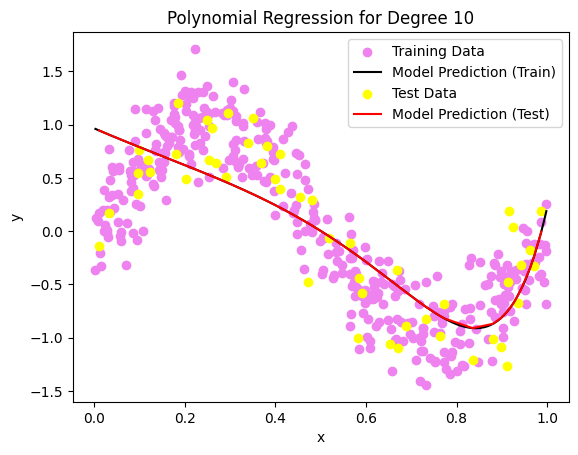

In [105]:
# Plotting
plt.scatter(x_train, y_train,color='violet', label='Training Data')
plt.plot(x_train, y_train_pred, label='Model Prediction (Train)', color='black')
plt.scatter(x_test, y_test,color='yellow', label='Test Data')
plt.plot(x_test, y_test_pred, label='Model Prediction (Test)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression for Degree 10')
plt.legend()
plt.show()




### **Question 2**
**Generate 400 data points in R^2 from the uniform distribution U [0, 1].
Construct the training set T = { (x11, x21, y1), (x21, x22, y2), ... , (x1001, x1002, y100) } using the relation Yi = sin(2π(xi1^2 + xi2^2)) + εi where εi ~ N(0, 0.25).**

**In the same way, construct a testing set of size 50, i.e., Test = { (x'11, x'12, y'1), (x'21, x'22, y'2), ... , (x'501, x'502, y'50) }.**

**Estimate the regularized polynomial regression of order 10 (using either direct or gradient method) and obtain a 3D plot on the test set along with the test data points. Find the NMSE, RMSE, MAE, and R^2.**


In [106]:
# Generate random training data of size 400
x1_train = np.sort(np.random.uniform(low=0.0, high=1.0, size=400))
x2_train = np.sort(np.random.uniform(low=0.0, high=1.0, size=400))

# Generate random testing data of size 50
x1_test = np.sort(np.random.uniform(low=0.0, high=1.0, size=50))
x2_test = np.sort(np.random.uniform(low=0.0, high=1.0, size=50))

# Calculate y_train and y_test
def generate_y(x1, x2):
    return np.sin(2 * np.pi * (x1**2 + x2**2)) + np.random.normal(0, 0.25)

y_train_new = np.array([generate_y(x1, x2) for x1, x2 in zip(x1_train, x2_train)])
y_test_new = np.array([generate_y(x1, x2) for x1, x2 in zip(x1_test, x2_test)])

# Creating Pandas Dataframe
train_df = pd.DataFrame({ 'x1': x1_train, 'x2': x2_train, 'y': y_train_new })
test_df = pd.DataFrame({ 'x1': x1_test, 'x2': x2_test, 'y': y_test_new })

print("Training Set")
print(train_df.head())

print("Testing Set")
print(test_df.head())

Training Set
         x1        x2         y
0  0.001970  0.000029  0.017986
1  0.002525  0.002165 -0.152593
2  0.005563  0.002255  0.256415
3  0.005606  0.002707  0.211049
4  0.006152  0.002791  0.227635
Testing Set
         x1        x2         y
0  0.038336  0.040065 -0.175649
1  0.062166  0.042127 -0.189651
2  0.094101  0.066655  0.016830
3  0.108466  0.075344  0.377629
4  0.112455  0.085044  0.179220


In [107]:
# degree 10 polynomial features in 2 dimensions
def deg_2f(x1, x2, d):
    num_columns = int((d + 1) * (d + 2) / 2)
    poly_features_new = np.zeros((len(x1), num_columns))

    col_no = 0  # Initialize column number

    for i in range(d + 1):
        for j in range(d + 1 - i):
            poly_features_new[:, col_no] = (x1**i) * (x2**j)
            col_no += 1

    return poly_features_new

# Gradient Descent Algorithm
def gradient_descent_2(l, x_train_poly, y_train, w1, b1, iter1, lmda1, lr1):

  instances = l
  X = x_train_poly
  Y = y_train
  num_iterations = iter1
  lmda = lmda1
  learning_rate = lr1

  for i in range(num_iterations):
      # Predict the value of y
      y_pred_new = X.dot(w1) + b1

      x_train_T = X.T
      # Calculate the gradients
      grad_w_new = (1 / instances) * (x_train_T.dot(y_pred_new - Y)) + lmda * w1
      grad_b_new = (1 / instances) * (np.sum(y_pred_new - Y))

      # Update parameters using gradient
      w1 -= learning_rate * grad_w_new
      b1 -= learning_rate * grad_b_new
  return weight, bias

In [108]:
x_train_poly_features = np.array(deg_2f(x1_train, x2_train, 10))
x_test_poly_features = np.array(deg_2f(x1_test, x2_test, 10))

In [109]:
print(x_train_poly_features.shape)
print(x_test_poly_features.shape)

(400, 66)
(50, 66)


In [110]:
# Hyper-parameters Initialization
degree = 10
learning_rate = 0.01
num_iterations = 10000
lmda = 0.1

# Initializing weights and bias
weight = np.random.randn(int((degree + 1) * (degree + 2) / 2), 1)
bias = 0

In [111]:
y_train_new_reshaped = y_train_new.reshape(-1, 1)

weight, bias = gradient_descent_2(len(x1_train), x_train_poly_features, y_train_new_reshaped, weight, bias, num_iterations, lmda, learning_rate) # run the gradient descent algo

print('The values of Weight:',weight)
print('The values of Bias:',bias)

The values of Weight: [[ 3.68472231e-03]
 [-7.85801122e-02]
 [-8.51973210e-02]
 [-4.81455203e-02]
 [-1.95484770e-02]
 [-6.49261943e-03]
 [-4.45431310e-03]
 [-8.01569131e-03]
 [-1.39526883e-02]
 [-1.99312823e-02]
 [-2.47025966e-02]
 [-5.46513263e-02]
 [-6.81786738e-02]
 [-3.74027354e-02]
 [-1.30997271e-02]
 [-2.59598191e-03]
 [-2.19002636e-03]
 [-6.85707531e-03]
 [-1.32060487e-02]
 [-1.94544477e-02]
 [-2.43968676e-02]
 [-5.21194716e-02]
 [-2.71869078e-02]
 [-6.85104867e-03]
 [ 9.66897735e-04]
 [-4.82885608e-05]
 [-5.71240309e-03]
 [-1.24674534e-02]
 [-1.89969507e-02]
 [-2.41309788e-02]
 [-1.75880113e-02]
 [-9.50933506e-04]
 [ 4.46915468e-03]
 [ 1.90126961e-03]
 [-4.52297693e-03]
 [-1.19414614e-02]
 [-1.85970385e-02]
 [-2.38818390e-02]
 [ 4.52767617e-03]
 [ 7.69403289e-03]
 [ 3.80470884e-03]
 [-3.45623143e-03]
 [-1.13326095e-02]
 [-1.82602991e-02]
 [-2.36244827e-02]
 [ 1.07182197e-02]
 [ 5.45203872e-03]
 [-2.55299157e-03]
 [-1.07610064e-02]
 [-1.78683437e-02]
 [-2.33294005e-02]
 [ 7.0797

In [112]:
y_test_new_pred = np.dot(x_test_poly_features, weight) + bias

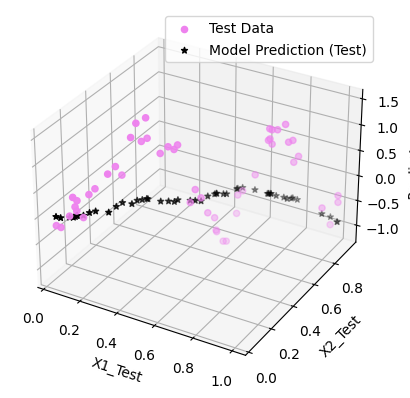

In [113]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the training data
ax.scatter(x1_test, x2_test, y_test_new, c='violet', marker='o', label='Test Data')

# Plot the model prediction for training data
ax.scatter(x1_test, x2_test, y_test_new_pred, c='black', marker='*', label='Model Prediction (Test)')

# Label axes
ax.set_xlabel('X1_Test')
ax.set_ylabel('X2_Test')
ax.set_zlabel('Predictions')

# Add a legend
ax.legend()

# Show the 3D plot
plt.show()

In [114]:
import math
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r_squared = r2_score(y_test_new, y_test_new_pred)
mae = mean_absolute_error(y_test_new, y_test_new_pred)
mse = mean_squared_error(y_test_new, y_test_new_pred)
rmse = np.sqrt(mse)

print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", mae)

R-squared: -0.3800949492996455
Mean Absolute Error: 0.6789226934455648
Mean Square Error: 0.6703839780578843
Root Mean Square Error: 0.6789226934455648





### **Question 3**
**Consider the motorcycle dataset. Estimate a regularized least square regression model with Gaussian basis functions. Obtain the plot of
estimated functions along with data points. Also obtain the RMSE, MAE,
NMSE and R^2 for evaluating the quality of fit.**

In [115]:
import random

df = pd.read_excel('/content/drive/MyDrive/Daiict/Foml/Assignment-4/motorcycle.xlsx')

# Converting the X and Y columns to lists
X = df['x'].tolist()
Y = df['y'].tolist()

# Seting a random seed for reproducibility
random.seed(42)  # You can choose any seed value

# Defining the proportion of data for training (e.g., 80%)
train_ratio = 0.8

# Calculating the number of samples for training and testing
num_samples = len(X)
num_train_samples = int(train_ratio * num_samples)
num_test_samples = num_samples - num_train_samples

# Creating indices for shuffling the data
indices = list(range(num_samples))
random.shuffle(indices)

# Spliting the indices into training and testing indices
train_indices = indices[:num_train_samples]
test_indices = indices[num_train_samples:]

# Creating the training and testing datasets
X_train = [X[i] for i in train_indices]
Y_train = [Y[i] for i in train_indices]
X_test = [X[i] for i in test_indices]
Y_test = [Y[i] for i in test_indices]

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
# Calculating Gaussian basis function values
def gaussian_basis(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

In [118]:
M = 10
# Initializing centers
centers = np.linspace(0, 10, M)

sigma = 0.5  # Constant spread parameter

In [119]:
# Creating a matrix to store Gaussian basis function values for each data point
phi_matrix = np.zeros((len(X_train), M))

# Populating the matrix
for i in range(M):
    phi_matrix[:, i] = gaussian_basis(X_train, centers[i], sigma)

# Adding a bias term to the feature matrix
Phi = np.column_stack((np.ones(len(X_train)), phi_matrix))

# Defining the regularization parameter
lambda_ = 0.01

In [120]:
from numpy.linalg import inv

# Compute the optimal coefficients Beta's
XTX = np.dot(Phi.T, Phi)
lambdaI = lambda_ * np.identity(M + 1)
beta = np.dot(np.dot(inv(XTX + lambdaI), Phi.T), Y_train)


In [121]:
# Calculating Gaussian basis function values for the new data
phi_new = np.zeros((len(X_test), M))
for i in range(M):
    phi_new[:, i] = gaussian_basis(X_test, centers[i], sigma)

# Adding a bias term
Phi_new = np.column_stack((np.ones(len(X_test)), phi_new))

# Makeing predictions
predictions = np.dot(Phi_new, beta)


In [122]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r_squared = r2_score(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Root Mean Square Error:", mae)

R-squared: 0.055141157696243615
Mean Absolute Error: 31.749511492885116
Root Mean Square Error: 31.749511492885116
